#Лабораторная работа №3
## Обработка бинарных изображений. Морфология.

1. Открыть изображение, преобразовать в бинарное. Или создать бинарное изображение средствами OpenCV.
2. Зашумить изображение импульсным шумом с вероятностью p (по вариантам).
  *   Вход: изображение из пункта 1.
  *   Вывод: зашумленное изображение.
3. Написать функции реализации эрозии и дилатации.

> Функции вида fun(Image, struct)  
Где struct  - структурный элемент в виде матрицы

4. Выполнить операции эрозии и дилатации для зашумленного изображения со структурным элементом заданным по вариантам.
  *   Вход: изображение из пункта 2.
  *   Вывод: Исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после эрозии и дилатации.
5. Отфильтровать зашумленное изображение при помощи морфологических операций вскрытия и закрытия (структурный элемент задан по вариантам).  
Подсчитать коэффициент шума для результа фильтрации.
  *   Вход: изображение из пункта 2.
  *   Вывод:  исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после вскрытия и закрытия. Коэффициент шума.
  *   Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.

6. На исходном изображении  с помощью морфологических операций выделить контур объекта. Выяснить, когда контур получается внешним, внутренним, четырёхсвязным, восьмисвязным.
  *   Вход: изображение из пункта 1.
  *   Вывод: исходное изображение, изображение с выделенными контурами.

7. На исходном изображении  с помощью морфологических операций выделить горизонтальные и вертикальные контуры объекта.
  *   Вход: изображение из пункта 1.
  *   Вывод: исходное изображение, изображение с выделенными горизонтальными контурами, изображение с выделенными вертикальными контурами.

  
    
    
*Для работы с изображением использовать OpenCV (открытие, сохранение и т.д.). Для визуализации можно использовать matplotlib. Все необходимые для задания функции реализовавать самим, а не использовать готовые в OpenCV, если не указано обратного.*
  
  
  

---



> По всем вопросам писать в ЛС в tg ***volfgunus***




Ссылки на полезные ресурсы:

1.    [Документация OpenCV](https://docs.opencv.org/4.x/index.html)
1.    [Связанность пикселей](https://en.wikipedia.org/wiki/Pixel_connectivity)
1.    [Математическая морфология](https://en.wikipedia.org/wiki/Mathematical_morphology)



# Варианты задания


№ варианта | Вероятность p | Вид структурного элемента
--- | :---: | :---:
1 | 0,1 | крест 5×5
2 | 0,15 | квадрат 3×3
3 | 0,2 | крест 3×3
4 | 0,25 | квадрат 5×5
5 | 0,3 | квадрат 3×3
6 | 0,35 | крест 5×5
7 | 0,1 | крест 3×3
8 | 0,2 | квадрат 5×5
9 | 0,3 | крест 3×3
10 | 0,25 | крест 5×5
11 | 0,12 | квадрат 5×5



# Контрольные темы

1. Бинарные изображения.
2. Основные операции математической морфологии.
3. Эрозия и дилатация.
4. Вскрытие изображения.
5. Закрытие изображения.
6. Выделение контуров на бинарном изображении.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1. Открыть изображение, преобразовать в бинарное. Или создать бинарное изображение средствами OpenCV.

Исходное изображение


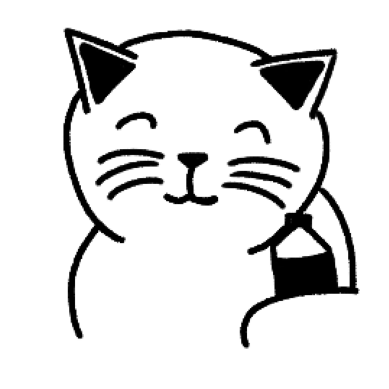

Бинарное изображение


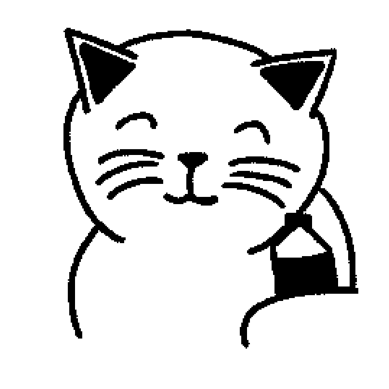

In [2]:
def show_image(image):
    # image = normalize(image).astype('uint8')
    
    # plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
    
image_orig = cv2.resize(cv2.imread('img4.png',1).astype('uint8')[:,:,::-1], (256,256))
# image_orig = cv2.resize(cv2.imread('img4.png',1).astype('uint8')[:,:,::-1], (2000,2000))
    
def to_grayscale(image):
    image_gray = np.zeros([image.shape[0],image.shape[1]], dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_gray[i][j] = 0.2989*image[i,j,0]+0.5870*image[i,j,1]+0.1140*image[i,j,2]
    return image_gray    

def to_bin(image, thresh):
    image_gray = to_grayscale(image)
    image_bin = np.zeros_like(image_gray, dtype=bool)
    image_bin[image_gray > thresh] = True
    return image_bin

print("Исходное изображение")
show_image(image_orig) # Менять тут
image_bin = to_bin(image_orig, thresh=128)
print("Бинарное изображение")
show_image(image_bin)
    

2. Зашумить изображение импульсным шумом с вероятностью p (по вариантам).
  *   Вход: изображение из пункта 1.
  *   Вывод: зашумленное изображение. <br>
p = 0.3

Зашумленное изображение


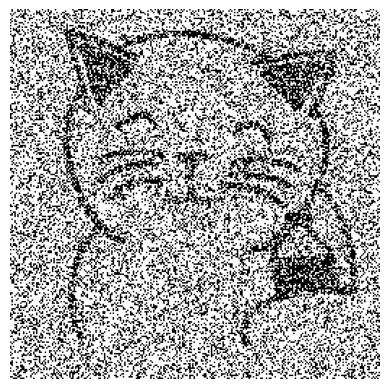

In [3]:
def impulse_noise(image):
    p = 0.3
    mask = np.random.rand(image.shape[0],image.shape[1]) < p
    image_noised = image ^ mask
    return image_noised.astype('bool')
    
image_noise = impulse_noise(image_bin)
print("Зашумленное изображение")
show_image(image_noise)

3. Написать функции реализации эрозии и дилатации.

> Функции вида fun(Image, struct)  
Где struct  - структурный элемент в виде матрицы

In [4]:
def dilation_maxmin(image, struct):
    image_h, image_w = image.shape
    struct_h, struct_w = struct.shape
    
    struct_h_center = struct_h // 2
    struct_w_center = struct_w // 2
    
    image_l = np.zeros((image_h + struct_h, image_w + struct_w), dtype=bool)
    image_l[struct_h_center:struct_h_center+image_h, struct_w_center:struct_w_center+image_w] = image
    
    image_dil = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = image_l[i:i + struct_h, j:j + struct_w]
            image_dil[i, j] = np.max(region[struct])
    return image_dil.astype('bool')

# def dilation_copy(image, struct):
#     image_h, image_w = image.shape
#     struct_h, struct_w = struct.shape
#     height, width = image_h + struct_h - 1, image_w + struct_w - 1
#     
#     image_dil = np.zeros((height,width), dtype=bool)
#     for i in range(image_h):
#         for j in range(image_w):
#             if image[i,j | struct[struct_h//2,struct_w//2]].all(): 
#                 image_dil[i:struct_h+i,j:struct_w+j] = struct
#     return image_dil[struct.shape[0]//2:-struct.shape[0]//2+1,
#            struct.shape[1]//2:-struct.shape[1]//2+1]

In [5]:
def erosion_maxmin(image, struct):
    image_h, image_w = image.shape
    struct_h, struct_w = struct.shape
    
    struct_h_center = struct_h // 2
    struct_w_center = struct_w // 2
    
    image_l = np.ones((image_h + struct_h, image_w + struct_w), dtype=bool)
    image_l[struct_h_center:struct_h_center+image_h, struct_w_center:struct_w_center+image_w] = image
    
    image_er = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = image_l[i: i + struct_h, j: j + struct_w]
            image_er[i, j] = np.min(region[struct])
    return image_er.astype('bool')
# 
# def erosion_copy(image, struct):
#     image_h, image_w = image.shape
#     struct_h, struct_w = struct.shape
#     height, width = image_h - struct_h - 1, image_w - struct_w - 1
#     
#     image_er = np.zeros_like(image, dtype=bool)
#     for i in range(height):
#         for j in range(width):
#             if (image[i:i+struct_h,j:j+struct_w] & struct).all(): 
#                 image_er[i + struct_h//2,j + struct_w//2] = True
#     return image_er

Проверка использования функций эрозии и дилатации
Применение функции дилатации к бинарному изображению:


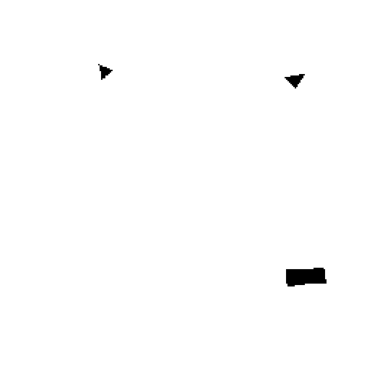

Применение функции эрозии к бинарному изображению:


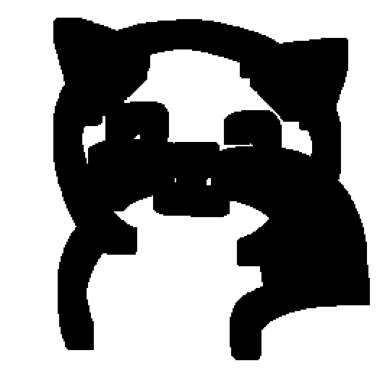

In [6]:
# struct = np.array([[1,1,1],[1,1,1],[1,1,1]], dtype=bool)
struct = np.ones((16,16),dtype=bool)

print("Проверка использования функций эрозии и дилатации")
print("Применение функции дилатации к бинарному изображению:")
show_image(dilation_maxmin(image_bin, struct))
print("Применение функции эрозии к бинарному изображению:")
show_image(erosion_maxmin(image_bin, struct))

4. Выполнить операции эрозии и дилатации для зашумленного изображения со структурным элементом заданным по вариантам.
  *   Вход: изображение из пункта 2.
  *   Вывод: Исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после эрозии и дилатации.

Применение функции дилатации к зашумленнуму изображению:


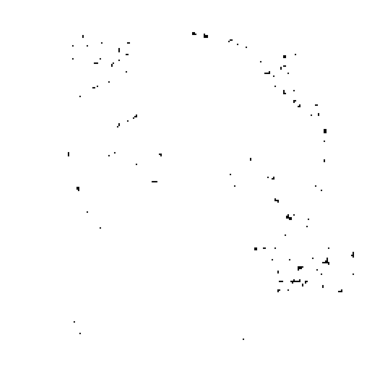

Применение функции эрозии к зашумленнуму изображению:


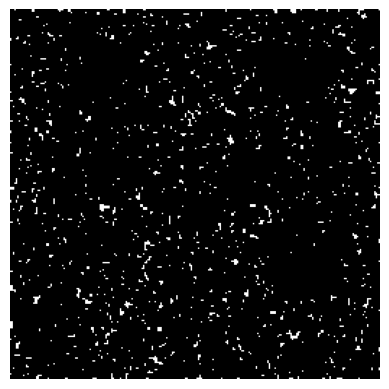

In [7]:
struct = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
], dtype=bool)
print("Применение функции дилатации к зашумленнуму изображению:")
show_image(dilation_maxmin(image_noise, struct))
print("Применение функции эрозии к зашумленнуму изображению:")
show_image(erosion_maxmin(image_noise, struct))

5. Отфильтровать зашумленное изображение при помощи морфологических операций вскрытия и закрытия (структурный элемент задан по вариантам).  
Подсчитать коэффициент шума для результа фильтрации.
  *   Вход: изображение из пункта 2.
  *   Вывод:  исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после вскрытия и закрытия. Коэффициент шума.
  *   Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.

In [8]:
def opening(image, struct):
    return dilation_maxmin(erosion_maxmin(image_noise, struct),struct).astype('bool')

def closure(image, struct):
    return erosion_maxmin(dilation_maxmin(image_noise, struct),struct).astype('bool')

def count_noise(image1, image2):
    return np.sum(image1 ^ image2)

Исходное изображение:


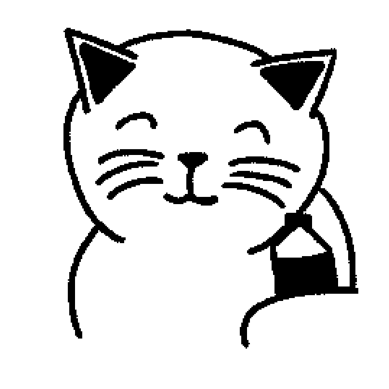

Зашумленное изображение:


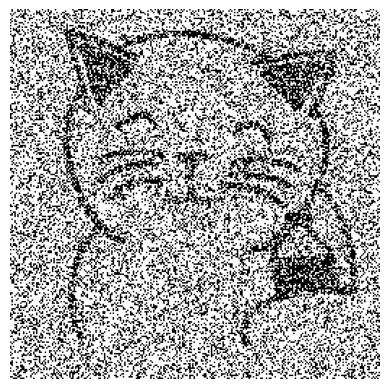

Коэффициент шума для изображения выше: 0.301788330078125
Зашумленное изображение после вскрытия:


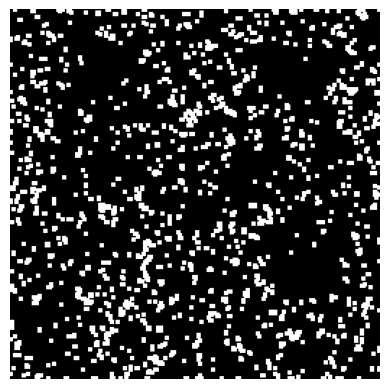

Коэффициент шума для изображения выше: 0.702606201171875
Зашумленное изображение после закрытия:


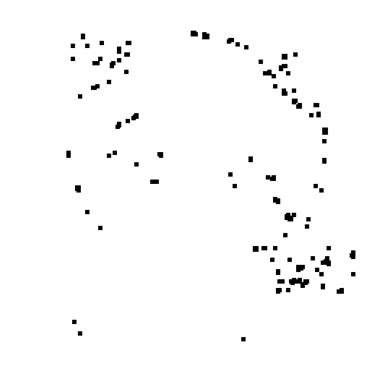

Коэффициент шума для изображения выше: 0.118377685546875


In [9]:
struct = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
], dtype=bool)

print("Исходное изображение:")
show_image(image_bin)

print("Зашумленное изображение:")
show_image(image_noise)
print("Коэффициент шума для изображения выше: " + str(count_noise(image_noise, image_bin)/(image_bin.shape[0]*image_bin.shape[1])))

print("Зашумленное изображение после вскрытия:")
op_image_noise = opening(image_noise, struct)
show_image(op_image_noise)
print("Коэффициент шума для изображения выше: " + str(count_noise(op_image_noise, image_bin)/(image_bin.shape[0]*image_bin.shape[1])))

print("Зашумленное изображение после закрытия:")
cl_image_noise = closure(image_noise, struct)
show_image(closure(image_noise, struct))
print("Коэффициент шума для изображения выше: " + str(count_noise(cl_image_noise, image_bin)/(image_bin.shape[0]*image_bin.shape[1])))



6. На исходном изображении  с помощью морфологических операций выделить контур объекта. Выяснить, когда контур получается внешним, внутренним, четырёхсвязным, восьмисвязным.
  *   Вход: изображение из пункта 1.
  *   Вывод: исходное изображение, изображение с выделенными контурами.

In [10]:
def find_in_contours(image, struct):
    return image_bin ^ erosion_maxmin(image_bin, struct)

def find_out_contours(image, struct):
    return image_bin ^ dilation_maxmin(image_bin, struct)


Исходное изображение:


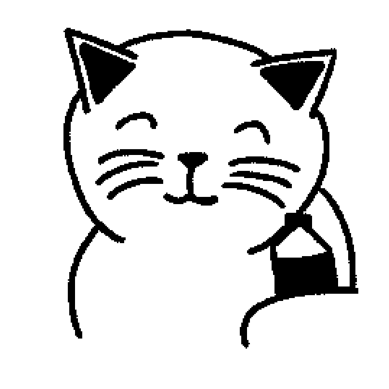

Изображение с внешним контуром


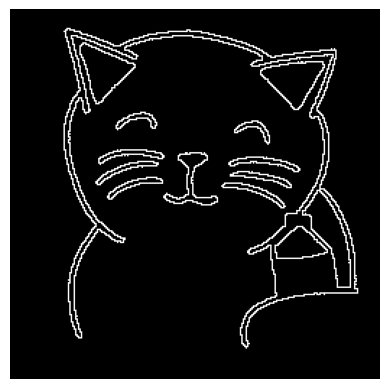

Изображение с внутренним контуром


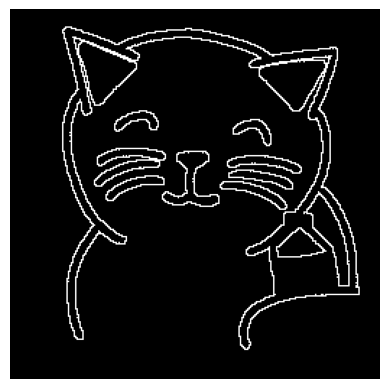

Изображение с четырехсвязным контуром


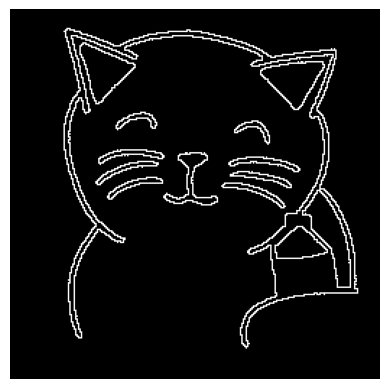

Изображение с восьмисвязным контуром


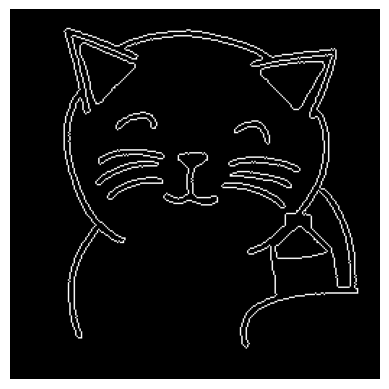

In [11]:
struct_4x = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
], dtype=bool)

struct_8x = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
], dtype=bool)


struct_mod = [struct_4x, struct_8x]
print_text = ["четырехсвязным контуром", "восьмисвязным контуром"]

print("Исходное изображение:")
show_image(image_bin)

print("Изображение с внешним контуром")
show_image(find_out_contours(image_bin, struct))
print("Изображение с внутренним контуром")
show_image(find_in_contours(image_bin, struct))

for i in range(2):
    print("Изображение с " + print_text[i])
    show_image(find_out_contours(image_bin, struct_mod[i]))

7. На исходном изображении  с помощью морфологических операций выделить горизонтальные и вертикальные контуры объекта.
  *   Вход: изображение из пункта 1.
  *   Вывод: исходное изображение, изображение с выделенными горизонтальными контурами, изображение с выделенными вертикальными контурами.

Исходное изображение:


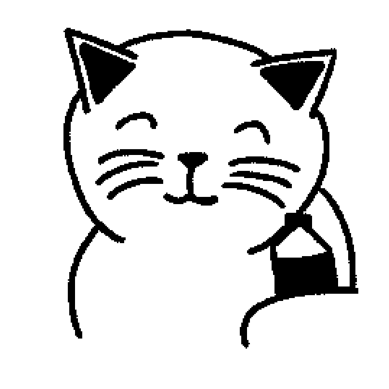

Изображение с горизонтальными контурами:


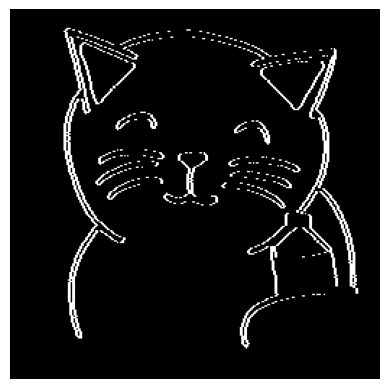

Изображение с вертикальными контурами:


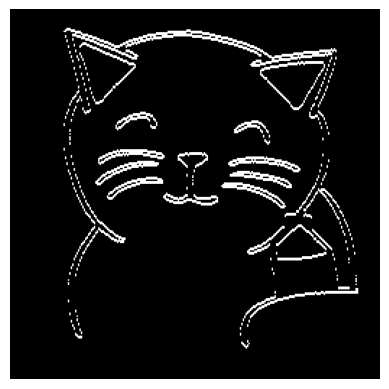

In [12]:
struct_ver = np.array([[1],[1],[1]], dtype=bool)
struct_hor = np.array([[1,1,1]], dtype=bool)

print("Исходное изображение:")
show_image(image_bin)
print("Изображение с горизонтальными контурами:")
show_image(find_out_contours(image_bin, struct_hor))
print("Изображение с вертикальными контурами:")
show_image(find_out_contours(image_bin, struct_ver))